In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as sm
import statsmodels.api as smf
%matplotlib inline

In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from utils.logistics_functions import *
from utils.Run_LCA_model import Run_LCA_model

In [3]:
Energy_optimal = pd.read_csv('results/Energy_m3_optimal_Resin_3.csv')
Energy_grid = pd.read_csv('results/Energy_m3_grid_Resin_3.csv')
Energy_random = pd.read_csv('results/Energy_m3_random_Resin_3.csv')
GHG_optimal = pd.read_csv('results/GHG_m3_optimal_Resin_3.csv')
GHG_grid = pd.read_csv('results/GHG_m3_grid_Resin_3.csv')
GHG_random = pd.read_csv('results/GHG_m3_random_Resin_3.csv')
COST_optimal = pd.read_csv('results/COST_m3_optimal_Resin_3.csv')
COST_grid = pd.read_csv('results/COST_m3_grid_Resin_3.csv')
COST_random = pd.read_csv('results/COST_m3_random_Resin_3.csv')

In [4]:
scenario = 'optimal'
if scenario == 'optimal':
    Result_Energy_m3 = Energy_optimal
    Result_GHG_m3 = GHG_optimal
    Result_COST_m3 = COST_optimal
if scenario == 'grid':
    Result_Energy_m3 = Energy_grid
    Result_GHG_m3 = GHG_grid
    Result_COST_m3 = COST_grid
if scenario == 'random':
    Result_Energy_m3 = Energy_random
    Result_GHG_m3 = GHG_random
    Result_COST_m3 = COST_random

In [5]:
Energy_optimal.set_value(0, 'n_facilities', 1)
Energy_optimal.set_value(10, 'n_facilities', 100)
GHG_optimal.set_value(0, 'n_facilities', 1)
GHG_optimal.set_value(10, 'n_facilities', 100)

,Unnamed: 0,Resin manufacturing,Cartridge manufacturing,Tank manufacturing,Pump operation,Pump manufacturing,Acid manufacturing,Cartridge collection,Trucks manufacturing,Bottling,Material transport,Fertilizer transport,Fertilizer offset,n_facilities,sum
0,0,0.419145,0.258642,0.000182,0.000003,0.000046,4.14566,0.673478,0.011994,0.159965,0.080376,0.001853,-13.5,1,5.751346
1,0,0.419145,0.258642,0.000186,0.000010,0.000161,4.14566,0.590280,0.011515,0.159965,0.081121,0.009346,-13.5,7,5.676031
2,0,0.419145,0.258642,0.000188,0.000017,0.000276,4.14566,0.574910,0.011674,0.159965,0.081867,0.013018,-13.5,12,5.665363
3,0,0.419145,0.258642,0.000191,0.000030,0.000506,4.14566,0.539394,0.010715,0.159965,0.083359,0.020040,-13.5,22,5.637647
4,0,0.419145,0.258642,0.000193,0.000044,0.000737,4.14566,0.518685,0.009595,0.159965,0.084850,0.022999,-13.5,32,5.620517
5,0,0.419145,0.258642,0.000196,0.000058,0.000967,4.14566,0.501332,0.008636,0.159965,0.086341,0.026630,-13.5,42,5.607573
6,0,0.419145,0.258642,0.000198,0.000072,0.001197,4.14566,0.487037,0.009436,0.159965,0.087833,0.027566,-13.5,52,5.596751
7,0,0.419145,0.258642,0.000199,0.000086,0.001427,4.14566,0.473051,0.009915,0.159965,0.089324,0.035570,-13.5,62,5.592986
8,0,0.419145,0.258642,0.000201,0.000100,0.001657,4.14566,0.461818,0.011515,0.159965,0.090816,0.034834,-13.5,72,5.584353
9,0,0.419145,0.258642,0.000202,0.000113,0.001888,4.14566,0.452601,0.013114,0.159965,0.092307,0.038981,-13.5,82,5.582619


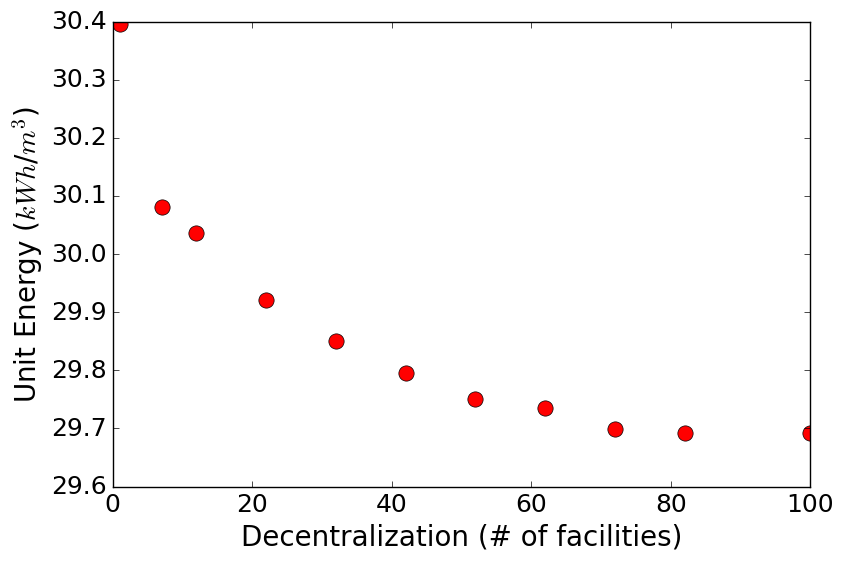

In [6]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_Energy_m3["n_facilities"], Result_Energy_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(50,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)', fontsize = 20)

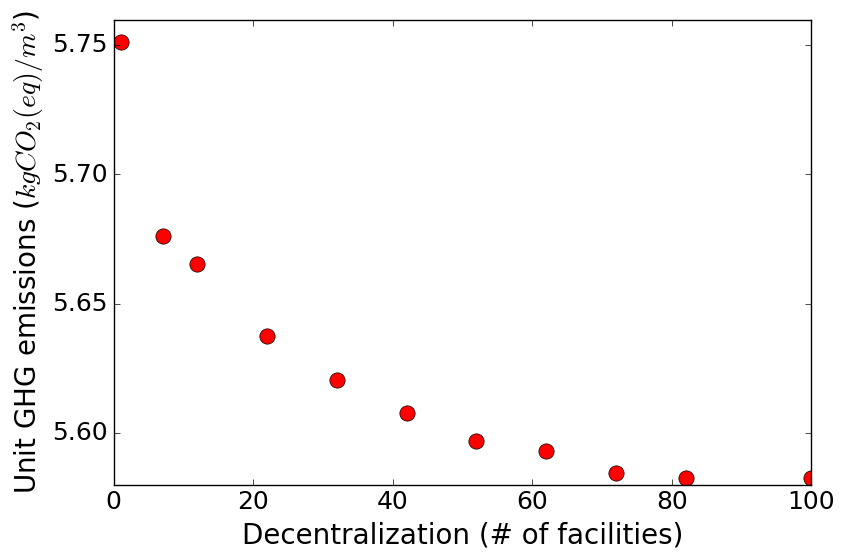

In [7]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_GHG_m3["n_facilities"], Result_GHG_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)', fontsize = 20)

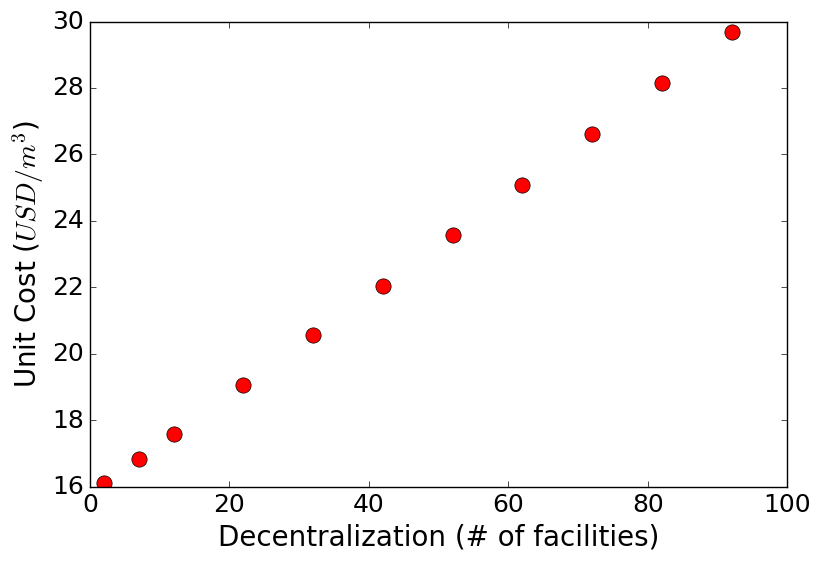

In [8]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_COST_m3["n_facilities"], Result_COST_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Cost ($USD/m^3$)', fontsize = 20)

In [9]:
Result_Energy_m3['number_facilities'] = Result_Energy_m3.n_facilities.astype(str)+ " facilities"
Result_GHG_m3['number_facilities'] = Result_GHG_m3.n_facilities.astype(str)+ " facilities"
Result_COST_m3['number_facilities'] = Result_COST_m3.n_facilities.astype(str)+ " facilities"

In [10]:
Labor_cost_min = Result_COST_m3['Labor_trucks'][0]
Labor_cost_max = Result_COST_m3.iloc[-1]['Labor_trucks']
Labor_cost_max

6.7259713713893863

In [11]:
Labor_cost_min = Result_COST_m3['Labor_facility'][0]
Labor_cost_max = Result_COST_m3.iloc[-1]['Labor_facility']
Labor_cost_max

24.307206631005968

In [12]:
Result_Energy_m3_plot = Result_Energy_m3.drop('sum',1).drop('n_facilities',1)
Result_GHG_m3_plot = Result_GHG_m3.drop('sum',1).drop('n_facilities',1)
Result_COST_m3_plot = Result_COST_m3.drop('sum',1).drop('n_facilities',1).drop('Labor',1).drop('Labor_facility',1).drop('Labor_trucks',1)

In [13]:
Fertilizer_offset_cost = Result_COST_m3_plot['Fertilizer offset'][0]
Fertilizer_offset_energy = Result_Energy_m3_plot['Fertilizer offset'][0]
Fertilizer_offset_GHG = Result_GHG_m3_plot['Fertilizer offset'][0]
print("Fertilizer_offset_cost %s "%Fertilizer_offset_cost)
print("Fertilizer_offset_energy %s "%Fertilizer_offset_energy)
print("Fertilizer_offset_GHG %s "%Fertilizer_offset_GHG)

Fertilizer_offset_cost -12.75 
Fertilizer_offset_energy -31.25 
Fertilizer_offset_GHG -13.5 


In [14]:
Result_Energy_m3_plot['other'] = (Result_Energy_m3_plot['Material transport'] + Result_Energy_m3_plot['Tank manufacturing'] +
                                 Result_Energy_m3_plot['Pump manufacturing']+Result_Energy_m3_plot['Pump operation']+
                                 Result_Energy_m3_plot['Trucks manufacturing']+Result_Energy_m3_plot['Fertilizer transport'])
Result_GHG_m3_plot['other'] = (Result_GHG_m3_plot['Material transport'] + Result_GHG_m3_plot['Tank manufacturing'] +
                                 Result_GHG_m3_plot['Pump manufacturing']+Result_GHG_m3_plot['Pump operation']+
                              Result_GHG_m3_plot['Trucks manufacturing']+Result_GHG_m3_plot['Fertilizer transport'])
Result_COST_m3_plot['other'] = (Result_COST_m3_plot['Material transport'] + Result_COST_m3_plot['Tank manufacturing'] +
                                 Result_COST_m3_plot['Pump manufacturing'] +Result_COST_m3_plot['Pump operation']+
                               Result_COST_m3_plot['Trucks manufacturing']+Result_COST_m3_plot['Fertilizer transport'])

Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['Unnamed: 0','Material transport', 'Tank manufacturing',
                                                   'Pump manufacturing', 'Pump operation', 'Fertilizer transport',
                                                    'Trucks manufacturing', 'Fertilizer offset'] , 1)
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['Unnamed: 0','Material transport', 'Tank manufacturing',
                                                   'Pump manufacturing', 'Pump operation', 'Fertilizer transport',
                                              'Trucks manufacturing', 'Fertilizer offset'] , 1)
Result_COST_m3_plot = Result_COST_m3_plot.drop(['Unnamed: 0','Material transport', 'Tank manufacturing',
                                                   'Pump manufacturing',  'Pump operation','Fertilizer transport',
                                                'Trucks manufacturing', 'Fertilizer offset'] , 1)

In [15]:
Result_Energy_m3_plot['Renting facility space'] = 0
Result_GHG_m3_plot['Renting facility space'] = 0

In [16]:
Result_COST_m3_plot['Renting facility space '] = Result_COST_m3_plot['Renting facility space']
Result_COST_m3_plot = Result_COST_m3_plot.drop(['Renting facility space'] , 1)
Result_COST_m3_plot['other '] = Result_COST_m3_plot['other']
Result_COST_m3_plot = Result_COST_m3_plot.drop(['other'] , 1)
Result_Energy_m3_plot['other '] = Result_Energy_m3_plot['other']
Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['other'] , 1)
Result_GHG_m3_plot['other '] = Result_GHG_m3_plot['other']
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['other'] , 1)

In [17]:
Result_Energy_m3_plot_low = (Result_Energy_m3_plot[0:1])
Result_GHG_m3_plot_low = Result_GHG_m3_plot[0:1]
Result_COST_m3_plot_low = Result_COST_m3_plot[0:1]
Result_Energy_m3_plot_high = (Result_Energy_m3_plot[-1:])
Result_GHG_m3_plot_high = Result_GHG_m3_plot[-1:]
Result_COST_m3_plot_high = Result_COST_m3_plot[-1:]

In [18]:
energy_errors_1 = Result_Energy_m3_plot_low.copy().drop('number_facilities',1)
energy_errors_2 = Result_Energy_m3_plot_high.copy().drop('number_facilities',1)
ghg_errors_2 = Result_GHG_m3_plot_high.copy().drop('number_facilities',1)
ghg_errors_1 = Result_GHG_m3_plot_low.copy().drop('number_facilities',1)
cost_errors_1 = Result_COST_m3_plot_low.copy().drop('number_facilities',1)
cost_errors_2 = Result_COST_m3_plot_high.copy().drop('number_facilities',1)

In [19]:
energy_errors_1[energy_errors_1!=0] = 0 
energy_errors_1.set_value(energy_errors_1.index[0], 'other ', 4.2)
energy_errors_2[energy_errors_2!=0] = 0 
energy_errors_2.set_value(energy_errors_2.index[0], 'other ', 4.2)
ghg_errors_1[ghg_errors_1!=0] = 0 
ghg_errors_1.set_value(ghg_errors_1.index[0], 'other ', 1.1)
ghg_errors_2[ghg_errors_2!=0] = 0 
ghg_errors_2.set_value(ghg_errors_2.index[0], 'other ',1.1)
cost_errors_1[cost_errors_1!=0] = 0 
cost_errors_1.set_value(cost_errors_1.index[0], 'other ', 3.7)
cost_errors_2[cost_errors_2!=0] = 0 
cost_errors_2.set_value(cost_errors_2.index[0], 'other ', 3.7)

,Resin manufacturing,Cartridge manufacturing,Acid manufacturing,Cartridge collection,Bottling,Renting facility space,other
10,0.0,0.0,0.0,0.0,0.0,0.0,3.7


In [21]:
Result_Energy_m3_plot

,Resin manufacturing,Cartridge manufacturing,Acid manufacturing,Cartridge collection,Bottling,number_facilities,Renting facility space,other
0,3.492877,0.89187,22.145621,2.810916,0.72747,1 facilities,0,0.326382
1,3.492877,0.89187,22.145621,2.463669,0.72747,7 facilities,0,0.359369
2,3.492877,0.89187,22.145621,2.399520,0.72747,12 facilities,0,0.379042
3,3.492877,0.89187,22.145621,2.251283,0.72747,22 facilities,0,0.411764
4,3.492877,0.89187,22.145621,2.164852,0.72747,32 facilities,0,0.426871
5,3.492877,0.89187,22.145621,2.092423,0.72747,42 facilities,0,0.445440
6,3.492877,0.89187,22.145621,2.032761,0.72747,52 facilities,0,0.460004
7,3.492877,0.89187,22.145621,1.974387,0.72747,62 facilities,0,0.502752
8,3.492877,0.89187,22.145621,1.927504,0.72747,72 facilities,0,0.513632
9,3.492877,0.89187,22.145621,1.889036,0.72747,82 facilities,0,0.544892


In [22]:
Result_Energy_m3_plot_low['number_facilities'] = '1 facility'
Result_Energy_m3_plot_high['number_facilities'] = '100 facilities'
Result_GHG_m3_plot_low['number_facilities'] = '1 facility'
Result_GHG_m3_plot_high['number_facilities'] = '100 facilities'
Result_COST_m3_plot_low['number_facilities'] = '1 facility'
Result_COST_m3_plot_high['number_facilities'] = '100 facilities'

C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 8 Text yticklabel objects>)

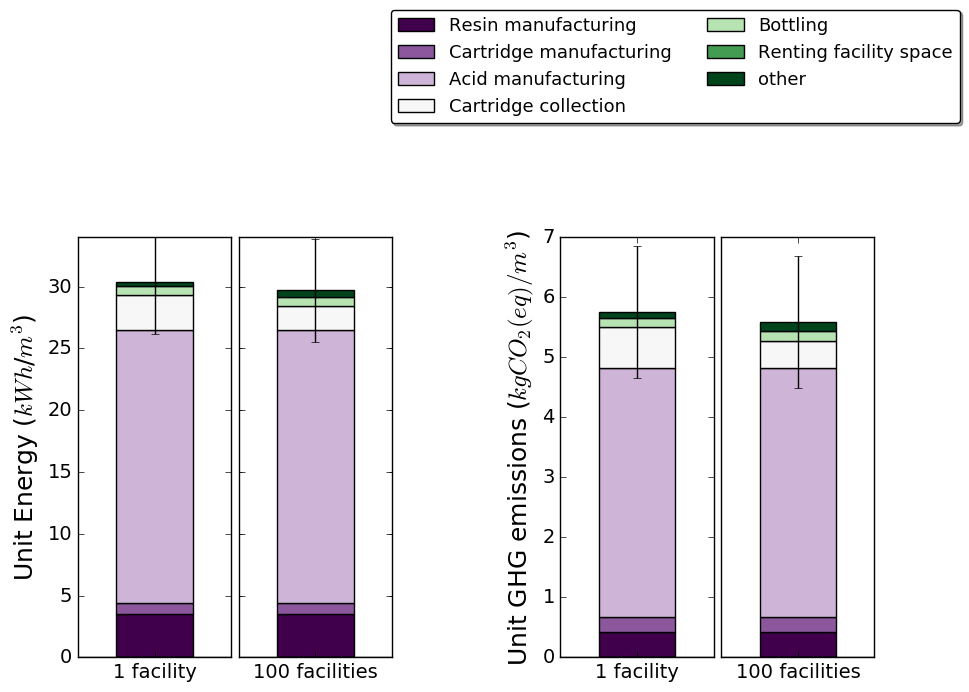

In [23]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1,5, 1)
a=Result_Energy_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=energy_errors_1)
a.set_xticklabels(Result_Energy_m3_plot_low['number_facilities'],fontsize = 14, rotation = 0)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.yticks(fontsize=14)
plt.ylim(0, 34)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,5, 2)
c=Result_Energy_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, sharey=True, legend=False,colormap='PRGn', yerr=energy_errors_2)
c.set_xticklabels(Result_Energy_m3_plot_high['number_facilities'],fontsize = 14, rotation = 0)
plt.ylim(0, 34)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.yticks(fontsize=14)
ax = fig.add_subplot(1,5, 4)
b=Result_GHG_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=ghg_errors_1)
b.set_xticklabels(Result_GHG_m3_plot_low['number_facilities'],fontsize = 14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylim(0, 7)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
a.legend(loc='lower center', bbox_to_anchor=(3.9, 1.25),ncol=2, fancybox=True, shadow=True,fontsize=13)
ax = fig.add_subplot(1,5, 5)
d=Result_GHG_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=ghg_errors_2)
d.set_xticklabels(Result_GHG_m3_plot_high['number_facilities'], fontsize = 14, rotation = 0)
d.get_yaxis().set_visible(False)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.ylim(0, 7)
fig.tight_layout()
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
plt.yticks(fontsize=14)

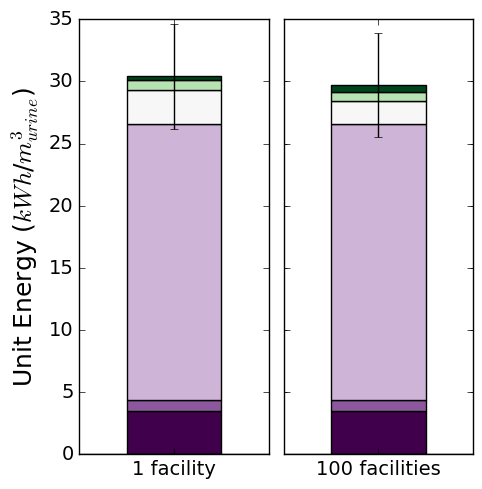

In [25]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,3, 1)
a=Result_Energy_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=energy_errors_1)
a.set_xticklabels(Result_Energy_m3_plot_low['number_facilities'],fontsize = 14, rotation = 0)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.yticks(fontsize=14)
plt.ylim(0, 35)
plt.ylabel('Unit Energy ($kWh$/$m^3_{urine}$)',fontsize=18)
ax = fig.add_subplot(1,3, 2)
c=Result_Energy_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, sharey= True, legend=False,colormap='PRGn', yerr=energy_errors_2)
c.set_xticklabels(Result_Energy_m3_plot_high['number_facilities'], fontsize = 14, rotation = 0)
plt.ylim(0, 35)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.yticks(fontsize=14)
fig.tight_layout()


In [26]:
a.legend(loc='lower center', bbox_to_anchor=(3.9, 1.25),ncol=2, fancybox=True, shadow=True,fontsize=13)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 8 Text yticklabel objects>)

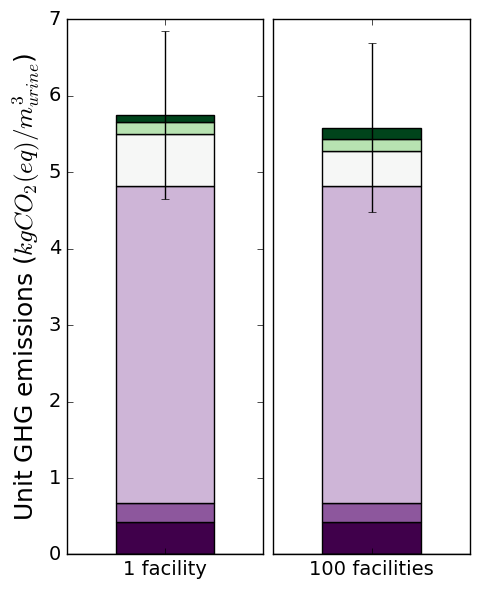

In [27]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1,3, 1)
b=Result_GHG_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=ghg_errors_1)
b.set_xticklabels(Result_GHG_m3_plot_low['number_facilities'],fontsize = 14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylim(0, 7)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3_{urine}$)',fontsize=18)
a.legend(loc='lower center', bbox_to_anchor=(3.9, 1.25),ncol=2, fancybox=True, shadow=True,fontsize=13)
ax = fig.add_subplot(1,3, 2)
d=Result_GHG_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=ghg_errors_2)
d.set_xticklabels(Result_GHG_m3_plot_high['number_facilities'], fontsize = 14, rotation = 0)
d.get_yaxis().set_visible(False)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.ylim(0, 7)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
plt.yticks(fontsize=14)

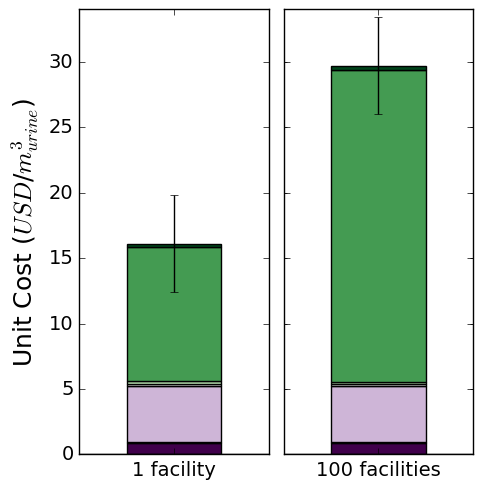

In [28]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,3, 1)
a=Result_COST_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn',yerr=cost_errors_1)
a.set_xticklabels(Result_COST_m3_plot_low['number_facilities'],fontsize = 14, rotation = 0)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.text(2.3, 1,'Labor cost (2 facilities): 6.7 $USD/m^3$', transform = ax.transAxes, fontsize = 13)
plt.ylim(0, 34)
plt.ylabel('Unit Cost ($USD$/$m^3_{urine}$)',fontsize=18)
#a.legend(loc='lower center', bbox_to_anchor=(1, 1.15),ncol=2, fancybox=True, shadow=True,fontsize=13)
ax = fig.add_subplot(1,3, 2)
c=Result_COST_m3_plot_high.plot(kind='bar', sharey=True, stacked = True,ax=ax, legend=False,colormap='PRGn',yerr=cost_errors_2)
c.set_xticklabels(Result_COST_m3_plot_high['number_facilities'],fontsize = 14, rotation = 0)
plt.ylim(0, 34)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.tight_layout()

In [29]:
Energy_optimal_log= Energy_optimal
Energy_optimal_log['logx'] = np.log(Energy_optimal_log['n_facilities'])
Energy_optimal_log['logEnergy'] = np.log(Energy_optimal_log['sum'])
energy_optimal = np.array(Energy_optimal_log['logEnergy'])
scale_optimal = np.array(Energy_optimal_log['logx'])

Energy_grid_log= Energy_grid
Energy_grid_log['logx'] = np.log(Energy_grid_log['n_facilities'])
Energy_grid_log['logEnergy'] = np.log(Energy_grid_log['sum'])
energy_grid = np.array(Energy_grid_log['logEnergy'])
scale_grid = np.array(Energy_grid_log['logx'])

Energy_random_log= Energy_random
Energy_random_log['logx'] = np.log(Energy_random_log['n_facilities'])
Energy_random_log['logEnergy'] = np.log(Energy_random_log['sum'])
energy_random = np.array(Energy_random_log['logEnergy'])
scale_random = np.array(Energy_random_log['logx'])

GHG_optimal_log = GHG_optimal
GHG_optimal_log['logx'] = np.log(GHG_optimal_log['n_facilities'])
GHG_optimal_log['logGHG'] = np.log(GHG_optimal_log['sum'])
ghg_optimal = np.array(GHG_optimal_log['logGHG'])

GHG_grid_log= GHG_grid
GHG_grid_log['logx'] = np.log(GHG_grid_log['n_facilities'])
GHG_grid_log['logGHG'] = np.log(GHG_grid_log['sum'])
ghg_grid = np.array(GHG_grid_log['logGHG'])

GHG_random_log= GHG_random
GHG_random_log['logx'] = np.log(GHG_random_log['n_facilities'])
GHG_random_log['logGHG'] = np.log(GHG_random_log['sum'])
ghg_random = np.array(GHG_random_log['logGHG'])

In [44]:
X_optimal = smf.add_constant(scale_optimal)
model = smf.OLS(energy_optimal , X_optimal)
results_optimal_energy = model.fit()

X_grid = smf.add_constant(scale_grid)
model = smf.OLS(energy_grid , X_grid)
results_grid_energy = model.fit()

X_random = smf.add_constant(scale_random)
model = smf.OLS(energy_random , X_random)
results_random_energy = model.fit()

X_optimal_GHG = smf.add_constant(scale_optimal)
model = smf.OLS(ghg_optimal , X_optimal_GHG)
results_optimal_GHG = model.fit()

X_grid_GHG = smf.add_constant(scale_grid)
model = smf.OLS(ghg_grid , X_grid_GHG)
results_grid_GHG = model.fit()

X_random_GHG = smf.add_constant(scale_random)
model = smf.OLS(ghg_random , X_random_GHG)
results_random_GHG = model.fit()

In [45]:
x1 = np.linspace(1,100, 500) # 100 linearly spaced numbers
y1_optimal = (x1**(results_optimal_energy.params[1]))*math.exp(results_optimal_energy.params[0])
aa=list(zip(x1,y1_optimal))
pl_optimal=pd.DataFrame(aa)
pl_optimal.columns=['x','isodistant']

y1_grid = (x1**(results_grid_energy.params[1]))*math.exp(results_grid_energy.params[0])
aa=list(zip(x1,y1_grid))
pl_grid=pd.DataFrame(aa)
pl_grid.columns=['x','grid']

y1_random = (x1**(results_random_energy.params[1]))*math.exp(results_random_energy.params[0])
aa=list(zip(x1,y1_random))
pl_random=pd.DataFrame(aa)
pl_random.columns=['x','random']

y1_optimal_GHG = (x1**(results_optimal_GHG.params[1]))*math.exp(results_optimal_GHG.params[0])
aa=list(zip(x1,y1_optimal_GHG))
pl_optimal_GHG=pd.DataFrame(aa)
pl_optimal_GHG.columns=['x','isodistant']

y1_grid_GHG = (x1**(results_grid_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_grid_GHG))
pl_grid_GHG=pd.DataFrame(aa)
pl_grid_GHG.columns=['x','grid']

y1_random_GHG = (x1**(results_random_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_random_GHG))
pl_random_GHG=pd.DataFrame(aa)
pl_random_GHG.columns=['x','random']

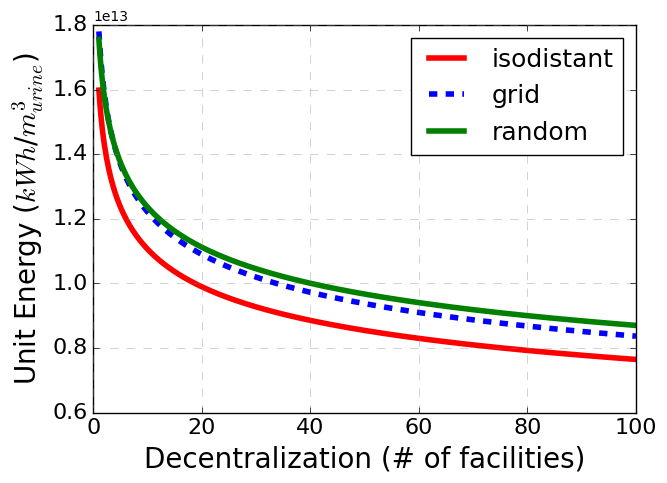

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(7, 5))
f = pl_optimal.plot( x='x', y='isodistant',fontsize=16, c='r', ax=ax, linewidth=4)
g = pl_grid.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4)
h = pl_random.plot( x='x', y='random',fontsize=16, c='g', ax=ax, linewidth=4)
h.legend(fontsize=18)
plt.xlim(0, 100)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit Energy ($kWh$/$m^3_{urine}$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

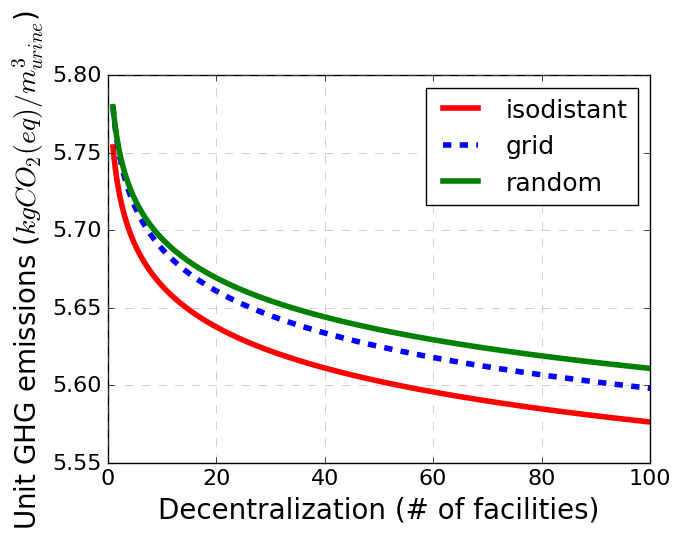

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(7, 5))
f = pl_optimal_GHG.plot( x='x', y='isodistant',fontsize=16, c='r', linestyle='-', ax=ax, linewidth=4, label='isodistant')
g = pl_grid_GHG.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4, label='grid')
h = pl_random_GHG.plot( x='x', y='random',fontsize=16, c='g', linestyle='-', ax=ax, linewidth=4, label='random')
plt.xlim(0, 100)
h.legend(fontsize=18)
#plt.ylim(4.5, 5.1)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3_{urine}$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

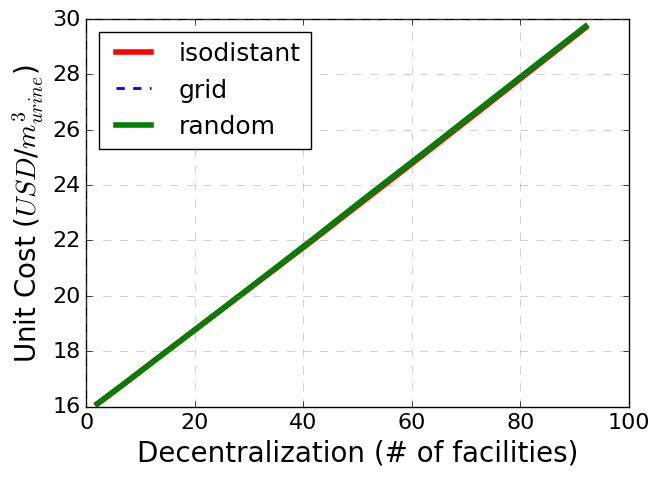

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(7, 5))
f = plt.plot( COST_optimal['n_facilities'], COST_optimal['sum'], c='r', linewidth=4, label = 'isodistant')
g = plt.plot( COST_grid['n_facilities'], COST_grid['sum'], c='b',linestyle='--', linewidth=2, label = 'grid')
h = plt.plot( COST_random['n_facilities'], COST_random['sum'], c='g', linewidth=4, label = 'random')
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0, 100)
plt.ylabel('Unit Cost ($USD$/$m^3_{urine}$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.legend(fontsize=18, loc='upper left')

In [49]:
cost_optimal = np.array(COST_optimal['sum'])
energy_optimal = np.array(Energy_optimal['sum'])
cost_grid = np.array(COST_grid['sum'])
energy_grid = np.array(Energy_grid['sum'])
cost_random = np.array(COST_random['sum'])
energy_random = np.array(Energy_random['sum'])
ghg_optimal_sum = np.array(GHG_optimal['sum'])
ghg_grid_sum = np.array(GHG_grid['sum'])
ghg_random_sum = np.array(GHG_random['sum'])

In [60]:
Ys_opt[-1] = 29.6917

C:\Users\Olga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


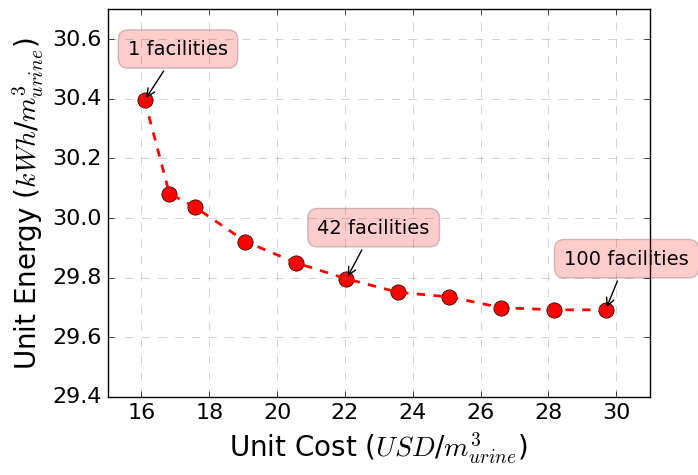

In [69]:
Xs_opt, Ys_opt = cost_optimal, energy_optimal
Xs_grid, Ys_grid = cost_grid, energy_grid
Xs_rand, Ys_rand = cost_random, energy_random
# Find lowest values for cost and highest for savings
p_front_optimal = pareto_frontier(Xs_opt, Ys_opt, maxX = False, maxY = True) 
p_front_grid = pareto_frontier(Xs_grid, Ys_grid, maxX = False, maxY = True) 
p_front_random = pareto_frontier(Xs_rand, Ys_rand, maxX = False, maxY = True) 
# Plot a scatter graph of all results
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(7, 5))
plt.plot(Xs_opt, Ys_opt,'ro', markersize=11)
plt.plot(p_front_optimal[0], p_front_optimal[1], 'r--', linewidth=2)
#plt.plot(Xs_rand, Ys_rand,'g^', markersize=11, label = 'random')
#plt.plot(p_front_random[0], p_front_random[1], 'g--', label = 'Pareto curve (random)', linewidth=2)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(29.4,30.7)
plt.xlim(15,31)
plt.ylabel('Unit Energy ($kWh$/$m^3_{urine}$)',fontsize=20)
plt.xlabel('Unit Cost ($USD$/$m^3_{urine}$)',fontsize=20)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.legend(fontsize = 16)
labels = ['{0} facilities'.format(i) for i in Energy_optimal['n_facilities']]
for label, x, y in list(zip(labels, Xs_opt, Ys_opt)):
    if (label == '1 facilities') or (label == '42 facilities') or (label == '100 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (60, 30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'red', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
'''
for label, x, y in list(zip(labels, Xs_rand, Ys_rand)):
    if (label == '32 facilities')  or (label == '92 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (80, 30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'green', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
'''
plt.show()

In [65]:
Ys_opt[-1] =5.5826

C:\Users\Olga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


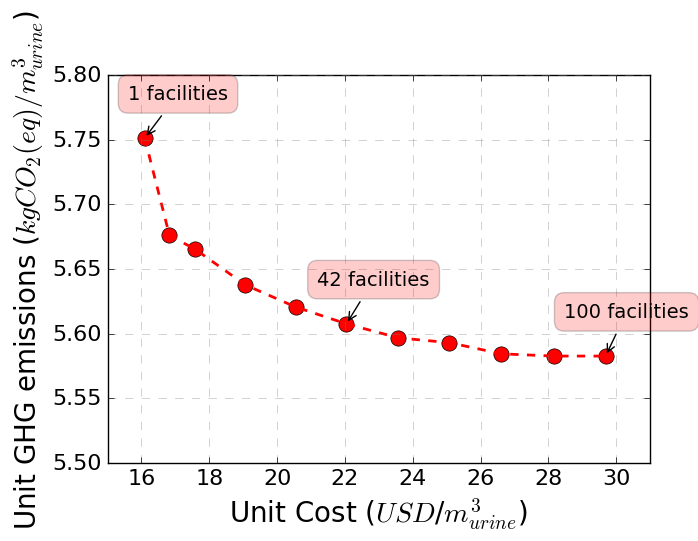

In [68]:
Xs_opt, Ys_opt = cost_optimal, ghg_optimal_sum
Xs_grid, Ys_grid = cost_grid, ghg_grid_sum
Xs_rand, Ys_rand = cost_random, ghg_random_sum
# Find lowest values for cost and highest for savings
p_front_optimal = pareto_frontier(Xs_opt, Ys_opt, maxX = False, maxY = True) 
p_front_grid = pareto_frontier(Xs_grid, Ys_grid, maxX = False, maxY = True) 
p_front_random = pareto_frontier(Xs_rand, Ys_rand, maxX = False, maxY = True) 
# Plot a scatter graph of all results
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(7, 5))
plt.plot(Xs_opt, Ys_opt,'ro', markersize=11)
plt.plot(p_front_optimal[0], p_front_optimal[1], 'r--', linewidth=2)
#plt.plot(Xs_rand, Ys_rand,'g^', markersize=11, label = 'random')
#plt.plot(p_front_random[0], p_front_random[1], 'g--', label = 'Pareto curve (random)', linewidth=2)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(5.5, 5.8)
plt.xlim(15,31)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3_{urine}$)',fontsize=20)
plt.xlabel('Unit Cost ($USD$/$m^3_{urine}$)',fontsize=20)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.legend(fontsize = 16)
labels = ['{0} facilities'.format(i) for i in Energy_optimal['n_facilities']]
for label, x, y in list(zip(labels, Xs_opt, Ys_opt)):
    if (label == '1 facilities') or (label == '42 facilities') or (label == '100 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (60, 25),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'red', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
'''
for label, x, y in list(zip(labels, Xs_rand, Ys_rand)):
    if (label == '35 facilities') or (label == '80 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (80, 30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'green', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
'''
plt.show()